In [1]:
!mkdir data
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/lenta.txt.zip -P data
!unzip -o data/lenta.txt.zip -d data/

--2024-09-26 15:24:58--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/lenta.txt.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/lenta.txt.zip [following]
--2024-09-26 15:24:59--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/lenta.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5723675 (5.5M) [application/zip]
Saving to: ‘data/lenta.txt.zip’

lenta.txt.zip       100%[===================>]   5.46M  --.-KB/s    in 0.09s   

2024-09-26 15:24:59 (61.3 MB/s) - ‘data/lenta.txt.zip’ sa

In [31]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

from collections import Counter
import re
import math
import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
russian_stopwords = set(stopwords.words('russian'))

In [4]:
corpus = open('data/lenta.txt').read()

## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokene(preserve_line=True) - ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия?

In [12]:
def ngrammer(tokens, n=5):
    ngrams = []
    for i in range(len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

In [13]:
# первый способ
sentences = sent_tokenize(corpus, language='russian')
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
tokenized_sentences = [[token.lower() for token in sentence if not re.match('\W+', token)]
                       for sentence in tokenized_sentences]

In [ ]:
ngram_counts = Counter()
for sentence in tokenized_sentences:
    ngram_counts.update(ngrammer([token for token in sentence if token not in russian_stopwords]))

In [ ]:
ngram_counts.most_common(20)

[('объединенной группировки войск северном кавказе', 83),
 ('сообщает риа новости ссылкой пресс-службу', 57),
 ('обязанности президента россии владимир путин', 47),
 ('группировки федеральных сил северном кавказе', 37),
 ('помощник президента россии сергей ястржембский', 35),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 30),
 ('штабе объединенной группировки федеральных сил', 25),
 ('министр иностранных дел россии игорь', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('иностранных дел россии игорь иванов', 23),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('главного управления борьбе организованной преступностью', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('заместитель начальника генштаба вооруженных сил', 20)

In [ ]:
# второй способ
tokenized_sentences_two = [word_tokenize(sentence, language='russian', preserve_line=True) for sentence in sentences]
tokenized_sentences_two = [[token.lower() for token in sentence if not re.match('\W+', token)]
                       for sentence in tokenized_sentences_two]

In [ ]:
ngram_counts_two = Counter()
for sentence in tokenized_sentences_two:
    ngram_counts_two.update(ngrammer([token for token in sentence if token not in russian_stopwords]))

In [ ]:
ngram_counts_two.most_common(20)

[('объединенной группировки войск северном кавказе', 83),
 ('сообщает риа новости ссылкой пресс-службу', 57),
 ('обязанности президента россии владимир путин', 47),
 ('группировки федеральных сил северном кавказе', 37),
 ('помощник президента россии сергей ястржембский', 35),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 30),
 ('штабе объединенной группировки федеральных сил', 25),
 ('министр иностранных дел россии игорь', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('иностранных дел россии игорь иванов', 23),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('главного управления борьбе организованной преступностью', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('заместитель начальника генштаба вооруженных сил', 20)

## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2022)

Вставьте сюда скриншот

Не самый интересный пример, но видно, как когда появились домашние компьютеры, они быстро приобрели популярность по сравнению с телевизорами, но сейчас телевизоры почти сравнялись с компьютерами, потому что люди все чаще используют современные телевизоры.

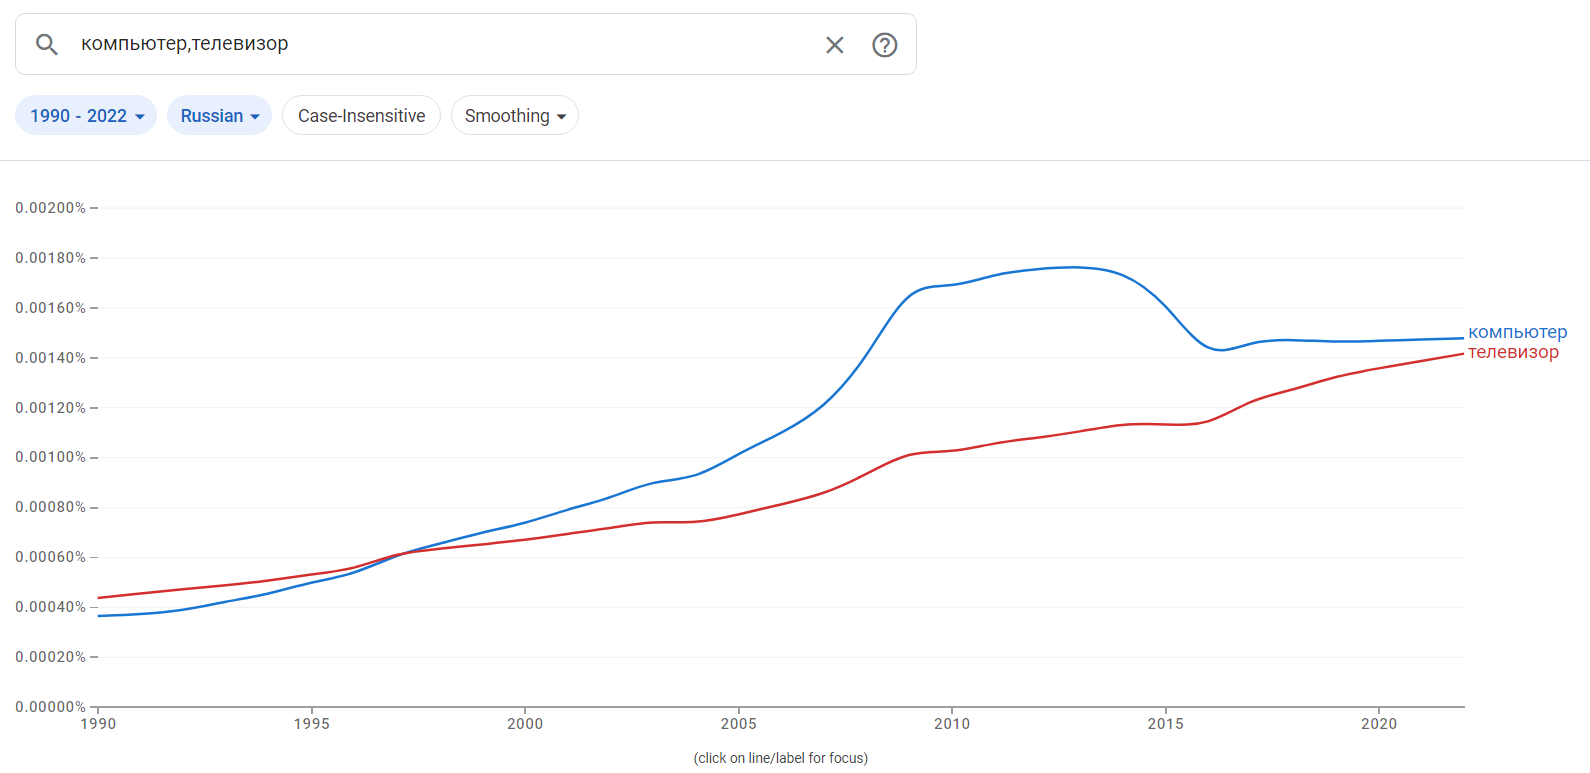

Еще у меня получилось несколько забавных картинок и даже не совсем понятно, с чем это связано, особенно вторая.

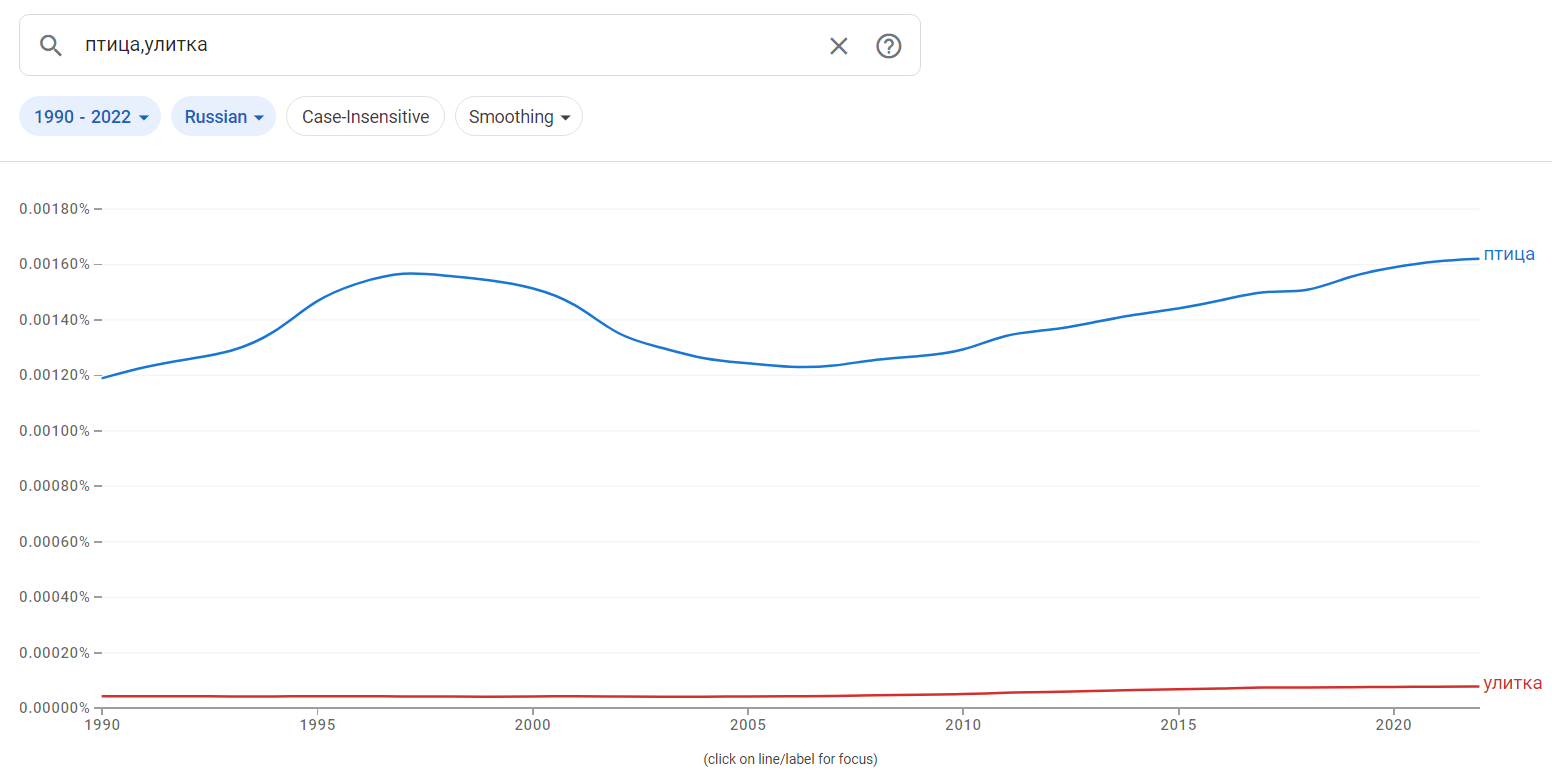

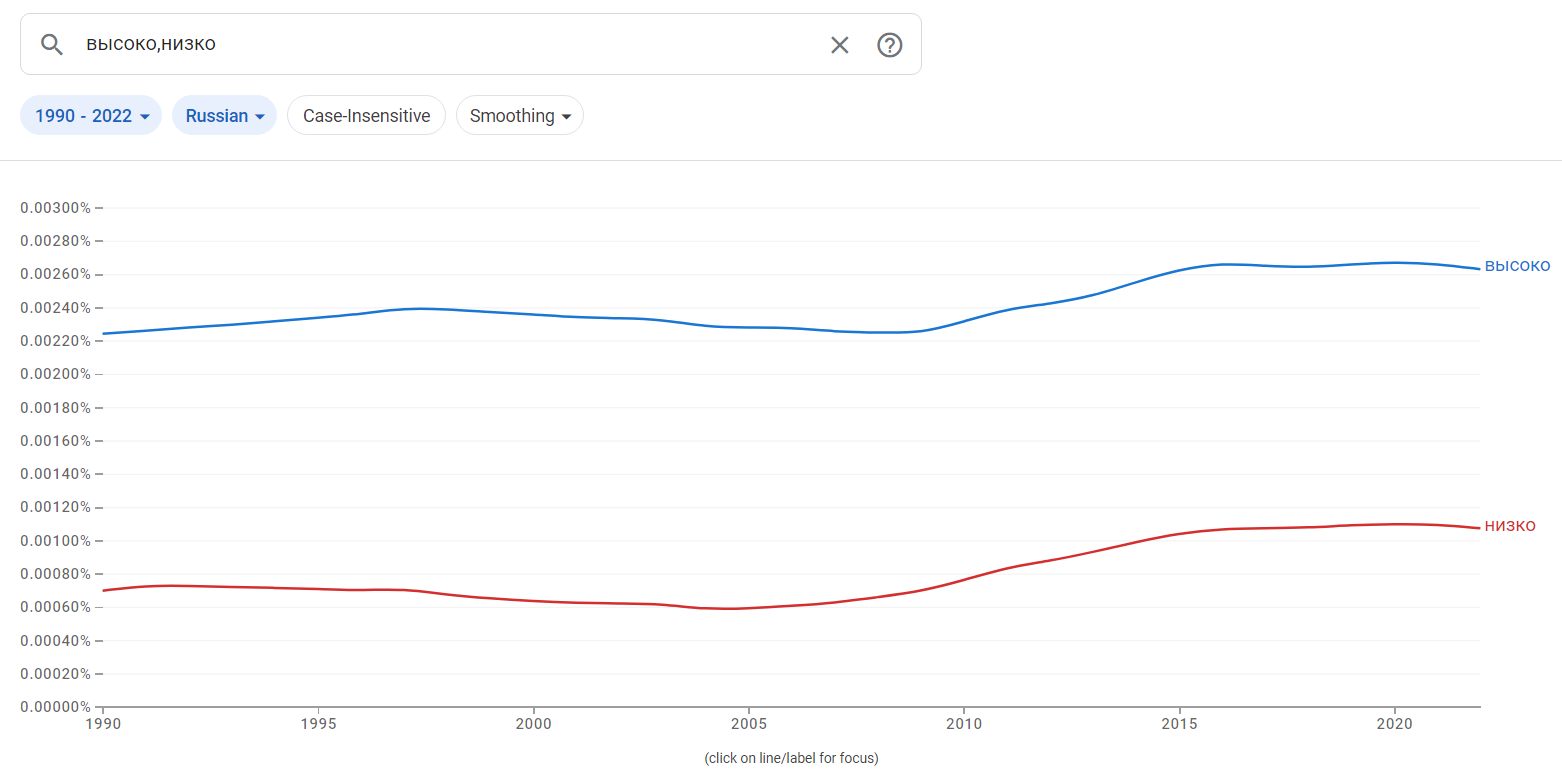

## Заданиe 3

Когда мы разбирали PMI мы использовали такую функцию:

In [20]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))
    except ZeroDivisionError:
        return 0
    return score

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

In [6]:
def scorer_complex(word_count_a, word_count_b, bigram_count, word_in_corpus_count, *args):
    try:
        score = math.log2((bigram_count/word_in_corpus_count) / ((word_count_a/word_in_corpus_count) * (word_count_b/word_in_corpus_count)))
    except ZeroDivisionError:
        return 0
    return score

In [17]:
# добавим стоп-слова сразу в нграммер для простоты
def ngrammer(tokens, n=2, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

In [8]:
def collect_stats(corpus, stops):
    ## соберем статистики для отдельных слов
    ## и биграммов

    unigrams = Counter()
    bigrams = Counter()

    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, 2, stops))

    return unigrams, bigrams

In [25]:
def score_bigrams(unigrams, bigrams, scorer, threshold=-100000):
    ## посчитаем метрику для каждого нграмма
    bigram2score = Counter()

    word_in_corpus_count = sum(Counter(list(unigrams.values())))
    for bigram in bigrams:
        word_a, word_b = bigram.split()
        if scorer == scorer_simple:
            score = scorer(unigrams[word_a], unigrams[word_b],
                            bigrams[bigram])
        else:
            score = scorer(unigrams[word_a], unigrams[word_b],
                            bigrams[bigram], word_in_corpus_count)

        ## если метрика выше порога, добавляем в словарик
        if score > threshold:
            bigram2score[bigram] = score

    return bigram2score

In [18]:
unigrams, bigrams = collect_stats(tokenized_sentences, russian_stopwords)

In [21]:
# старый PMI
bigram2score = score_bigrams(unigrams, bigrams, scorer_simple)
bigram2score.most_common(10)

[('сопоцкина друскеник', 0.5),
 ('неприятель приблизившись', 0.5),
 ('саноку обстреливалась', 0.5),
 ('м.ю лермонтова', 0.5),
 ('австрийский аэроплан', 0.5),
 ('показывался аэроплан-птица', 0.5),
 ('das ist', 0.5),
 ('ist nesteroff', 0.5),
 ('песнь нестерове', 0.5),
 ('могучий унесся', 0.5)]

In [28]:
# новый PMI
bigram2score_new = score_bigrams(unigrams, bigrams, scorer_complex)
bigram2score_new.most_common(10)

[('сопоцкина друскеник', 19.28533448256655),
 ('неприятель приблизившись', 19.28533448256655),
 ('саноку обстреливалась', 19.28533448256655),
 ('м.ю лермонтова', 19.28533448256655),
 ('австрийский аэроплан', 19.28533448256655),
 ('показывался аэроплан-птица', 19.28533448256655),
 ('das ist', 19.28533448256655),
 ('ist nesteroff', 19.28533448256655),
 ('песнь нестерове', 19.28533448256655),
 ('могучий унесся', 19.28533448256655)]

## Задание 4*

Обновите функцию получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов.

In [27]:
def scorer_complex(word_count_a, word_count_b, bigram_count, word_in_corpus_count, *args):
    try:
        score = (math.log2(bigram_count) - math.log2(word_in_corpus_count)) - ((math.log2(word_count_a) - math.log2(word_in_corpus_count)) + (math.log2(word_count_b) - math.log2(word_in_corpus_count)))
    except ZeroDivisionError:
        return 0
    return score

## Задание 5

Исследуйте gensim.models.Phrases. Проверьте сколько дефолтных scoring функций есть в этом классе. Попробуйте все доступные по умолчанию scoring функции и попробуйте настраивать для них значение threshold и min_count. Попробуйте сделать так, чтобы собиралось как можно больше нграммов. Попробуйте строить последовательность gensim.models.Phrases, чтобы строить более длинные нграммы

In [81]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=1,
                           threshold=1.,
                           scoring='default')
p = gensim.models.phrases.Phraser(ph)

ph2 = gensim.models.Phrases(p[tokenized_sentences],  min_count=1, threshold=1., scoring='default')
p2 = gensim.models.phrases.Phraser(ph2)

p2[p[tokenized_sentences[3]]]

['с_раннего_утра',
 '14_сентября',
 'огонь',
 'достиг',
 'значительного',
 'напряжения']

In [77]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=1,
                           threshold=1.,
                           scoring='default')
p = gensim.models.phrases.Phraser(ph)

ph2 = gensim.models.Phrases(p[tokenized_sentences],  min_count=1, threshold=1000., scoring='default')
p2 = gensim.models.phrases.Phraser(ph2)

p2[p[tokenized_sentences[3]]]

['с_раннего',
 'утра',
 '14_сентября',
 'огонь',
 'достиг',
 'значительного',
 'напряжения']

In [79]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=1,
                           threshold=1.,
                           scoring='default')
p = gensim.models.phrases.Phraser(ph)

ph2 = gensim.models.Phrases(p[tokenized_sentences],  min_count=20, threshold=1000., scoring='default')
p2 = gensim.models.phrases.Phraser(ph2)

p2[p[tokenized_sentences[3]]]

['с_раннего',
 'утра',
 '14_сентября',
 'огонь',
 'достиг',
 'значительного',
 'напряжения']

In [71]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=1,
                           threshold=1.,
                           scoring='default')
p = gensim.models.phrases.Phraser(ph)

ph2 = gensim.models.Phrases(p[tokenized_sentences],  min_count=20, threshold=1., scoring='default')
p2 = gensim.models.phrases.Phraser(ph2)

p2[p[tokenized_sentences[3]]]

['с_раннего',
 'утра',
 '14_сентября',
 'огонь',
 'достиг',
 'значительного',
 'напряжения']

In [73]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=1,
                           threshold=1.,
                           scoring='npmi')
p = gensim.models.phrases.Phraser(ph)

ph2 = gensim.models.Phrases(p[tokenized_sentences],  min_count=1, threshold=-1, scoring='npmi')
p2 = gensim.models.phrases.Phraser(ph2)

p2[p[tokenized_sentences[3]]]

['с_раннего',
 'утра_14',
 'сентября_огонь',
 'достиг_значительного',
 'напряжения']

In [74]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=1,
                           threshold=1.,
                           scoring='npmi')
p = gensim.models.phrases.Phraser(ph)

ph2 = gensim.models.Phrases(p[tokenized_sentences],  min_count=1, threshold=1, scoring='npmi')
p2 = gensim.models.phrases.Phraser(ph2)

p2[p[tokenized_sentences[3]]]

['с',
 'раннего',
 'утра',
 '14',
 'сентября',
 'огонь',
 'достиг',
 'значительного',
 'напряжения']

In [75]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=1,
                           threshold=1.,
                           scoring='npmi')
p = gensim.models.phrases.Phraser(ph)

ph2 = gensim.models.Phrases(p[tokenized_sentences],  min_count=20, threshold=1, scoring='npmi')
p2 = gensim.models.phrases.Phraser(ph2)

p2[p[tokenized_sentences[3]]]

['с',
 'раннего',
 'утра',
 '14',
 'сентября',
 'огонь',
 'достиг',
 'значительного',
 'напряжения']

In [76]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=1,
                           threshold=1.,
                           scoring='npmi')
p = gensim.models.phrases.Phraser(ph)

ph2 = gensim.models.Phrases(p[tokenized_sentences],  min_count=20, threshold=-1, scoring='npmi')
p2 = gensim.models.phrases.Phraser(ph2)

p2[p[tokenized_sentences[3]]]

['с',
 'раннего',
 'утра',
 '14',
 'сентября',
 'огонь',
 'достиг',
 'значительного',
 'напряжения']